In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("23111-0001_$F.xlsx")
df.head()

/opt/conda/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,"Hospitals, beds, patients: Germany, years",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Basic data on hospitals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year,Hospitals,Beds,Beds per 100 000 inhabitants,Patients,Patients per 100 000 inhabitants,Occupancy / billing days,Average length of stay,Average occupancy of hospital beds
3,NaN,number,number,number,number,number,1000,days,percent
4,1991,2411,665565,832,14576613,18224,204204,14,84.1


## We have read the file in the excel format.

In [3]:
df.shape

(38, 9)

## The dataset contains of 38rows and 9columns in total.

In [4]:
df=df.dropna()

## Dropped all the null values as they weren't much and helps to smoothen the data.


In [5]:
headers =  ["Year", "Hospitals", "Beds", "Beds per 1lakh inhabitants","Patients","Patients per 1lakh inhabitants","Occupancy / billing days","Average length of stay","Average occupancy of hospital beds"]
df.columns = headers

In [6]:
df.head()

,Year,Hospitals,Beds,Beds per 1lakh inhabitants,Patients,Patients per 1lakh inhabitants,Occupancy / billing days,Average length of stay,Average occupancy of hospital beds
2,Year,Hospitals,Beds,Beds per 100 000 inhabitants,Patients,Patients per 100 000 inhabitants,Occupancy / billing days,Average length of stay,Average occupancy of hospital beds
4,1991,2411,665565,832,14576613,18224,204204,14,84.1
5,1992,2381,646995,803,14974845,18581,198769,13.2,83.9
6,1993,2354,628658,774,15191174,18713,190741,12.5,83.1
7,1994,2337,618176,759,15497702,19034,186049,11.9,82.5


## The dataset is clean but we can see two rows as headers hence, dropping the 2nd row will be right.

In [7]:
df=df.drop(2,axis=0)

In [8]:
df.head()

,Year,Hospitals,Beds,Beds per 1lakh inhabitants,Patients,Patients per 1lakh inhabitants,Occupancy / billing days,Average length of stay,Average occupancy of hospital beds
4,1991,2411,665565,832,14576613,18224,204204,14,84.1
5,1992,2381,646995,803,14974845,18581,198769,13.2,83.9
6,1993,2354,628658,774,15191174,18713,190741,12.5,83.1
7,1994,2337,618176,759,15497702,19034,186049,11.9,82.5
8,1995,2325,609123,746,15931168,19509,182627,11.4,82.1


In [9]:
df=df.reset_index()

### Reseting the index

In [10]:
df=df.drop("index",axis=1)
df.head()

,Year,Hospitals,Beds,Beds per 1lakh inhabitants,Patients,Patients per 1lakh inhabitants,Occupancy / billing days,Average length of stay,Average occupancy of hospital beds
0,1991,2411,665565,832,14576613,18224,204204,14,84.1
1,1992,2381,646995,803,14974845,18581,198769,13.2,83.9
2,1993,2354,628658,774,15191174,18713,190741,12.5,83.1
3,1994,2337,618176,759,15497702,19034,186049,11.9,82.5
4,1995,2325,609123,746,15931168,19509,182627,11.4,82.1


In [11]:
df.describe()

,Year,Hospitals,Beds,Beds per 1lakh inhabitants,Patients,Patients per 1lakh inhabitants,Occupancy / billing days,Average length of stay,Average occupancy of hospital beds
count,31,31,31,31,31,31,31,31.0,31.0
unique,31,31,31,30,31,31,31,25.0,24.0
top,1991,2411,665565,615,14576613,18224,204204,7.2,77.4
freq,1,1,1,2,1,1,1,4.0,4.0


### Helps to understand the dataset in the coumputational format. Count is same overall so no missing values/nan values

In [12]:
df.dtypes

Year                                  object
Hospitals                             object
Beds                                  object
Beds per 1lakh inhabitants            object
Patients                              object
Patients per 1lakh inhabitants        object
Occupancy / billing days              object
Average length of stay                object
Average occupancy of hospital beds    object
dtype: object

In [13]:
for feature in df.columns:
    df[feature]=df[feature].astype(int)

In [14]:
df.dtypes

Year                                  int64
Hospitals                             int64
Beds                                  int64
Beds per 1lakh inhabitants            int64
Patients                              int64
Patients per 1lakh inhabitants        int64
Occupancy / billing days              int64
Average length of stay                int64
Average occupancy of hospital beds    int64
dtype: object

In [15]:
Beds_med=df['Beds'].median()
Beds_inhab_med=df['Beds per 1lakh inhabitants'].median()
Patients_med=df['Patients'].median()
Billing_days_med=df['Occupancy / billing days'].median()
Average_stay_med=df['Average length of stay'].median()


### Getting the median as mean would distort the values if any outlier will be present in the data.

In [16]:
Beds_med

510767.0

In [17]:
Beds_inhab_med

626.0

In [18]:
Patients_med

17262929.0

In [19]:
Billing_days_med

142893.0

In [20]:
Average_stay_med

8.0

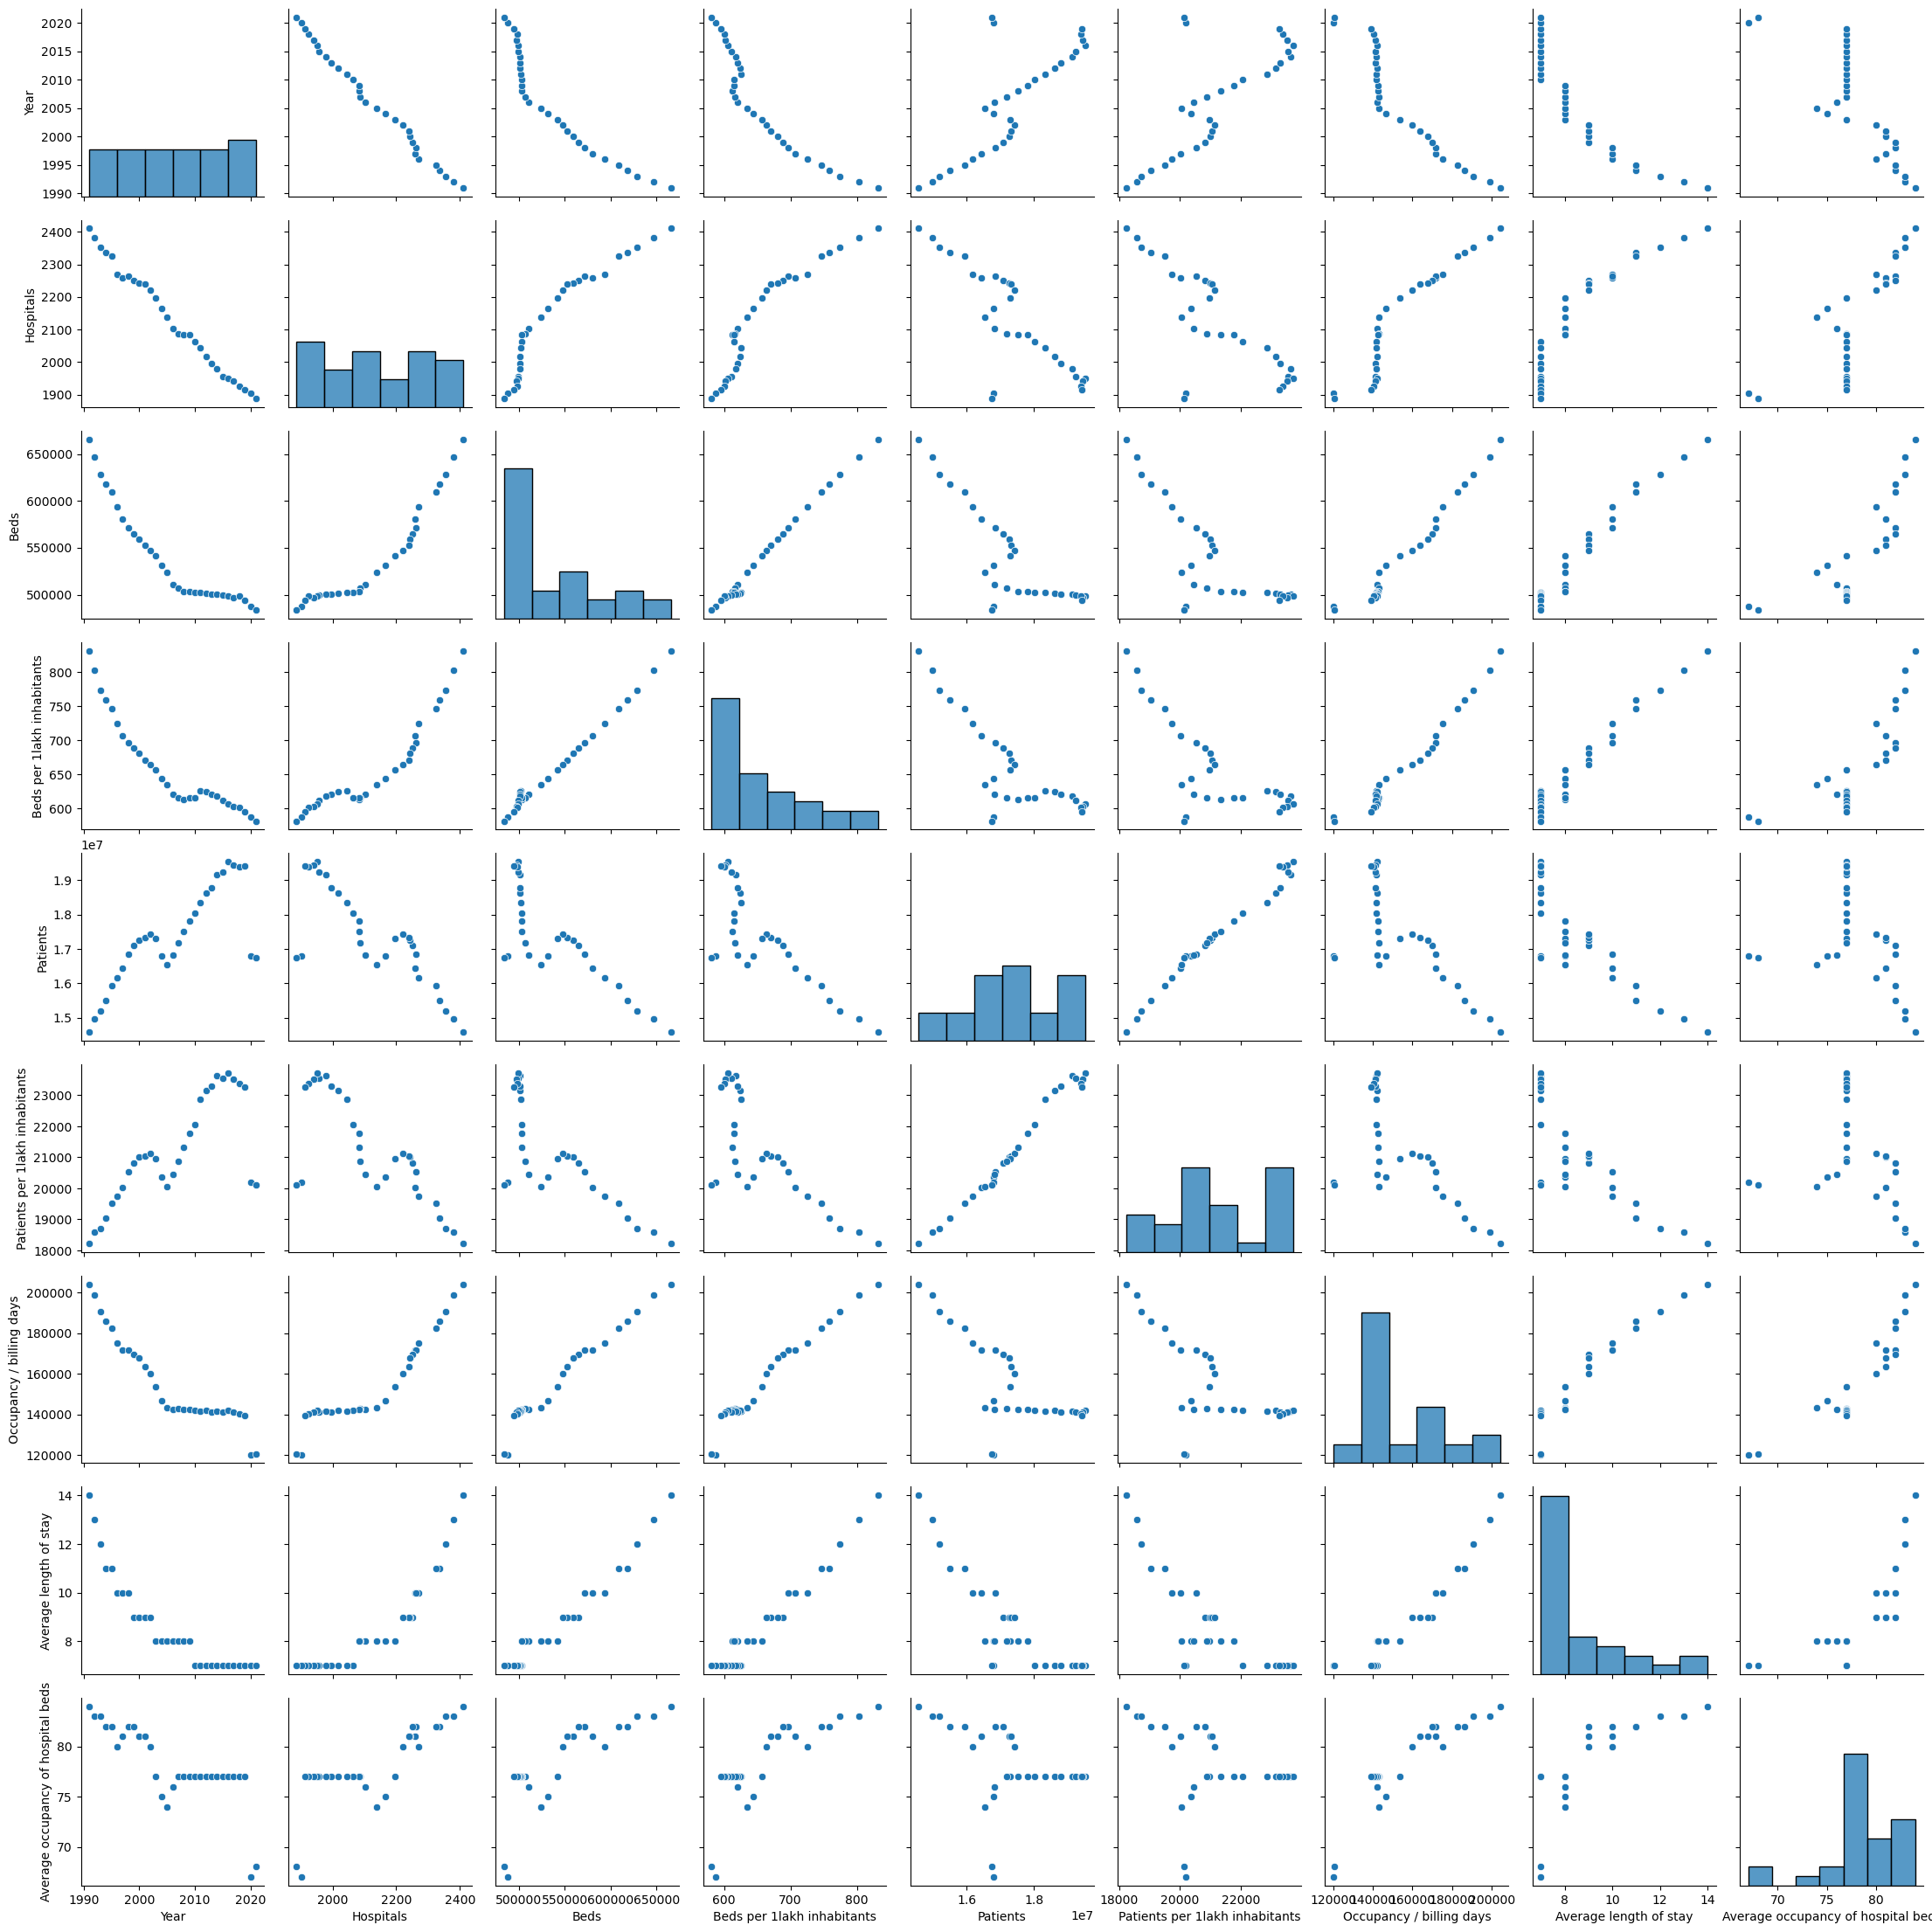

In [21]:
sns.pairplot(df)

## Above, we can see the relationship of the dimensions with eachother.

[Text(0, 0, '1991'),
 Text(1, 0, '1992'),
 Text(2, 0, '1993'),
 Text(3, 0, '1994'),
 Text(4, 0, '1995'),
 Text(5, 0, '1996'),
 Text(6, 0, '1997'),
 Text(7, 0, '1998'),
 Text(8, 0, '1999'),
 Text(9, 0, '2000'),
 Text(10, 0, '2001'),
 Text(11, 0, '2002'),
 Text(12, 0, '2003'),
 Text(13, 0, '2004'),
 Text(14, 0, '2005'),
 Text(15, 0, '2006'),
 Text(16, 0, '2007'),
 Text(17, 0, '2008'),
 Text(18, 0, '2009'),
 Text(19, 0, '2010'),
 Text(20, 0, '2011'),
 Text(21, 0, '2012'),
 Text(22, 0, '2013'),
 Text(23, 0, '2014'),
 Text(24, 0, '2015'),
 Text(25, 0, '2016'),
 Text(26, 0, '2017'),
 Text(27, 0, '2018'),
 Text(28, 0, '2019'),
 Text(29, 0, '2020'),
 Text(30, 0, '2021')]

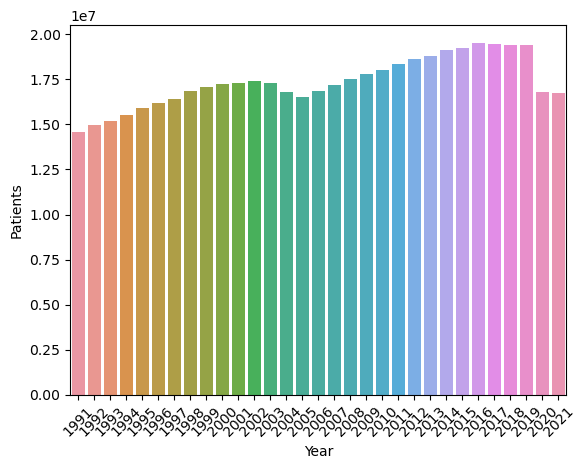

In [28]:
chart=sns.barplot(x="Year",y="Patients",data=df)
chart.set_xticklabels(labels=df['Year'],rotation=45)

## The number of patients have been morover the same over the years.


<AxesSubplot: xlabel='Average length of stay', ylabel='Patients'>

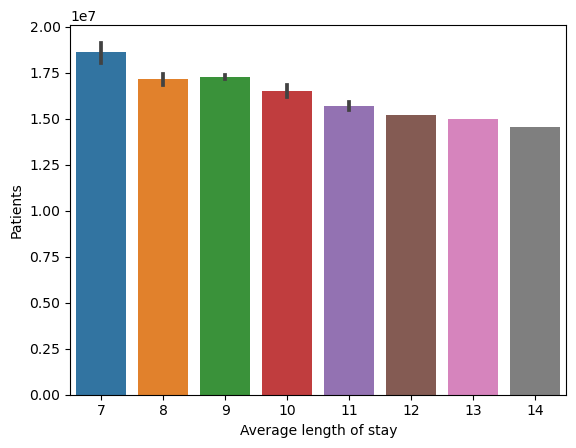

In [34]:
chart=sns.barplot(x="Average length of stay",y="Patients",data=df)
chart

## We can see that the average stay is decreasing over the years hence, showing that patients are recovering faster than before.

In [ ]:
## def ques_1(df):
    """
    An update on the current situation in the health care system with the help of the data of 22 years?"
    [Here, we will visualize the data to understand the relationship between the two
    dimensions.]

    Args:
        df: 
    Returns:
        ...
    """
    c=sns.barplot(x=df['Year'],y=df['Hospitals'],data=df)
    c.set_xticklabels(labels=df['Year'],rotation=45)

In [ ]:
##def ques_2(df):
"""
    Amount of days the patient stays on average in the hospital?
"""
plt.plot(df['Year'],df['Patients'])
plt.show()

In [ ]:
## def ques_3(df):
"""
    Health of citizens over the 22yrs?
    [We can understand this by seeing the occuapancy of the beds over the years]
"""
plt.plot(df['Year'],df['Average occupancy of hospital beds'])
plt.show()

In [ ]:
## def ques_4(df):
"""
    What is the cost over the years?
    [By this we can understand, we can see if it is increasing or decreasing over the years.]
"""
plt.plot(df['Year'],df['Occupancy / billing days'])
plt.show()